In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import dill
from IPython.core import display as ICD  # to print multiple nice pandas tables
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tqdm
import glob
from tqdm import tqdm_notebook, tnrange
sns.set()

In [2]:
import datasets
import classify
from simple_model import SimpleModel
from testing import test_simple_model

In [3]:
from collections import defaultdict


In [4]:
result_pattern = 'dumps/batch_results_{}.pickle'
dump_pattern = 'dumps/batch_dump_{}.pickle'

In [5]:
result_fnames = glob.glob(result_pattern.format('*'))

In [6]:
results = defaultdict(dict)
for fname in result_fnames:
    parts = fname[:-7].split('_')
    dataset = parts[2]
    scheme = parts[3]
    alpha = float(parts[4])
    dim = int(parts[5])
    d = pickle.load(open(fname,'rb'))
    for k1 in d:
        for k2 in d[k1]:
            results[k1][k2] = d[k1][k2]


In [20]:
lsa_result_file = 'dumps/results_baselines_simple_model.pickle'
lsa_result = pickle.load(open(lsa_result_file,'br'))

In [23]:
lsa_df = pd.DataFrame(lsa_result)

In [43]:
my_df = pd.DataFrame(results).loc['batch']

In [135]:
lsa_df = pd.read_hdf('clean_dumps/batch_results.hdf').rename(index={'lsa200':200, 'lsa300':300, 'lsa400':400})

In [136]:
lsa_df

CRDataset  MPQADataset  MRDataset  SUBJDataset  \
lsa scheme level_2                                                   
    None   test      0.780423     0.846371   0.770384     0.919000   
           train     0.972185     0.910420   0.979365     0.994125   
           valid     0.814324     0.829406   0.753283     0.898000   
    tfchi2 test      0.748677     0.812441   0.675726     0.849000   
           train     0.785099     0.853960   0.706062     0.842875   
           valid     0.761273     0.802074   0.659475     0.834000   
    tfgr   test      0.753968     0.813384   0.675726     0.849000   
           train     0.787748     0.854668   0.711455     0.845500   
           valid     0.755968     0.804901   0.660413     0.842000   
    tfidf  test      0.761905     0.847314   0.758201     0.916000   
           train     0.999007     0.979137   1.000000     1.000000   
           valid     0.806366     0.838831   0.747655     0.896000   
    tfig   test      0.753968     0.813384   0.675726     0.849000   
           train     0.787748     0.854668   0.711455     0.845500   
           valid     0.755968     0.804901   0.660413     0.842000   
    tfor   test      0.772487     0.838831   0.773196     0.904000   
           train     0.891060     0.885431   0.907492     0.936125   
           valid     0.803714     0.819039   0.767355     0.900000   
    tfrf   test      0.743386     0.835061   0.739456     0.886000   
           train     0.831457     0.866808   0.821667     0.917500   
           valid     0.777188     0.806786   0.703565     0.862000   
200 None   test      0.730423     0.782281   0.697751     0.859500   
           train     0.799934     0.790441   0.715699     0.889675   
           valid     0.767109     0.758247   0.650938     0.844700   
    tfchi2 test      0.730159     0.782564   0.698219     0.859700   
           train     0.799901     0.790912   0.715055     0.889562   
           valid     0.766313     0.757776   0.651313     0.844900   
    tfgr   test      0.730688     0.782187   0.697563     0.859400   
           train     0.799967     0.790488   0.714715     0.889587   
           valid     0.766048     0.758153   0.651313     0.845600   
...                       ...          ...        ...          ...   
300 tfig   test      0.743386     0.790669   0.702999     0.872000   
           train     0.804967     0.803984   0.734717     0.895962   
           valid     0.761273     0.766730   0.670826     0.850900   
    tfor   test      0.743122     0.790104   0.701125     0.872900   
           train     0.805099     0.803607   0.734377     0.895850   
           valid     0.761273     0.768049   0.670919     0.851400   
    tfrf   test      0.743386     0.791235   0.701500     0.872600   
           train     0.805199     0.803583   0.735045     0.895663   
           valid     0.761538     0.766918   0.670450     0.850300   
400 None   test      0.744444     0.800566   0.710309     0.876100   
           train     0.807152     0.817185   0.747051     0.899863   
           valid     0.764987     0.781244   0.663977     0.855200   
    tfchi2 test      0.744180     0.799340   0.710590     0.875500   
           train     0.806755     0.816667   0.747227     0.899688   
           valid     0.763660     0.781338   0.664353     0.855400   
    tfgr   test      0.743386     0.797926   0.712465     0.875400   
           train     0.806788     0.816690   0.746688     0.899838   
           valid     0.764721     0.781715   0.664822     0.853900   
    tfidf  test      0.744444     0.799152   0.709653     0.874800   
           train     0.806755     0.816832   0.747262     0.899562   
           valid     0.764191     0.782846   0.665760     0.856300   
    tfig   test      0.744180     0.799529   0.709934     0.876500   
           train     0.807185     0.817067   0.746770     0.899912   
           valid     0.765782     0.782752   0.664353     0.855200   
    tfor   test      0.743386 

# learning rate dependency

In [54]:
lines = defaultdict(list)
for dataset in my_df.columns:
    for scheme in my_df.index.levels[0]:
        for dim in my_df.index.levels[2]:
            for alpha in my_df.index.levels[1]:
                lines[(dataset, scheme, dim)].append(my_df.loc[(scheme, alpha, dim, 'test'), dataset])
    

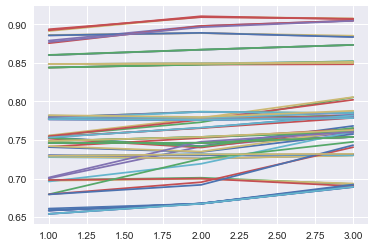

In [58]:
for k in lines:
    plt.plot([1,2,3],lines[k])

In [112]:
my_df.index.levels[1]

Float64Index([0.001, 0.01, 0.1], dtype='float64')

In [113]:
no_index = my_df.reset_index()
no_index = no_index[no_index['level_3']=='test']

In [114]:
no_index = no_index[['level_0','level_2','level_1']+my_df.columns.tolist()]

In [115]:
no_index = no_index.sort_values(['level_0','level_2','level_1'], ascending=True)
pivoted = pd.pivot_table(no_index, index = 'level_1', columns = ['level_0','level_2'], values=my_df.columns.tolist())

In [116]:
cm = sns.light_palette("green", as_cmap=True)
pivoted.style.background_gradient(cmap=cm)

In [140]:
pom = my_df.loc[(slice(None), slice(None),slice(None),'test'),:].reset_index()
grouped = pom.groupby(['level_0', 'level_2'], as_index=True)[['CRDataset', 'MPQADataset',
       'MRDataset', 'SUBJDataset']].max()

In [169]:
q = lsa_df[grouped.columns.values].loc[([200,300,400],slice(None),'test'),:]
q.index=q.index.droplevel(level=2)
q

CRDataset  MPQADataset  MRDataset  SUBJDataset
lsa scheme                                                
200 None     0.730423     0.782281   0.697751       0.8595
    tfchi2   0.730159     0.782564   0.698219       0.8597
    tfgr     0.730688     0.782187   0.697563       0.8594
    tfidf    0.730423     0.782375   0.697095       0.8598
    tfig     0.730159     0.781904   0.697470       0.8600
    tfor     0.730423     0.781621   0.696907       0.8595
    tfrf     0.730423     0.782187   0.696813       0.8595
300 None     0.743386     0.790104   0.702343       0.8724
    tfchi2   0.744709     0.790481   0.702905       0.8730
    tfgr     0.743651     0.790575   0.700656       0.8732
    tfidf    0.743915     0.791046   0.700094       0.8722
    tfig     0.743386     0.790669   0.702999       0.8720
    tfor     0.743122     0.790104   0.701125       0.8729
    tfrf     0.743386     0.791235   0.701500       0.8726
400 None     0.744444     0.800566   0.710309       0.8761
    tfchi2   0.744180     0.799340   0.710590       0.8755
    tfgr     0.743386     0.797926   0.712465       0.8754
    tfidf    0.744444     0.799152   0.709653       0.8748
    tfig     0.744180     0.799529   0.709934       0.8765
    tfor     0.743386     0.800848   0.709934       0.8761
    tfrf     0.744709     0.799434   0.708716       0.8755

In [170]:
gr = grouped.swaplevel(0,1).sort_index()
gr.index = gr.index.rename(['lsa','scheme'])
gr

CRDataset  MPQADataset  MRDataset  SUBJDataset
lsa scheme                                                
200 None     0.762698     0.782469   0.743299       0.9049
    tfchi2   0.759788     0.779642   0.688941       0.8513
    tfgr     0.753968     0.778511   0.692127       0.8519
    tfidf    0.764815     0.802168   0.760450       0.9094
    tfig     0.753968     0.778511   0.690815       0.8497
    tfor     0.786508     0.781338   0.731959       0.8890
    tfrf     0.730159     0.786051   0.701031       0.8734
300 None     0.764286     0.778699   0.740675       0.9047
    tfchi2   0.761905     0.781904   0.689035       0.8522
    tfgr     0.753968     0.780396   0.689784       0.8502
    tfidf    0.765608     0.805655   0.760918       0.9098
    tfig     0.753968     0.778511   0.690347       0.8514
    tfor     0.786772     0.781338   0.731771       0.8887
    tfrf     0.730423     0.786051   0.699719       0.8734
400 None     0.757672     0.781810   0.747610       0.9049
    tfchi2   0.762963     0.779736   0.689222       0.8483
    tfgr     0.753968     0.778511   0.690159       0.8513
    tfidf    0.768254     0.805278   0.759606       0.9106
    tfig     0.753968     0.778511   0.689878       0.8498
    tfor     0.786508     0.781527   0.731771       0.8889
    tfrf     0.729894     0.787936   0.700000       0.8734

In [172]:
diff = q-gr
cm = sns.light_palette("green", as_cmap=True)
diff.style.background_gradient(cmap=cm)

In [8]:
dump_pattern = 'dumps/batch_dump_{}.pickle'
dump_files = glob.glob(dump_pattern.format('*')) 

In [11]:
d = pickle.load(open(dump_files[0],'rb'))